<a href="https://colab.research.google.com/github/PrateekKumar88888/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Prateek_kumar_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Prediction </u></b>

## <b> Problem Description </b>

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [82]:
# importing  all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [83]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Loading the dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_mobile_price_range.csv')

In [85]:
#First 5 rows of the DataFrame
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [86]:
#Last 5 rows of the DataFrame
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [87]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [88]:
len(df.columns)

21

# Data Analysis

Data analysis is the practice of working with data to glean useful information, which can then be used to make informed decisions.

In [89]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

* We don't have any object data type in our data set.
* Also we have Zero null values in data set.
* Price_range is our target variable.

Text(0.5, 1.0, 'Visualising Missing Values')

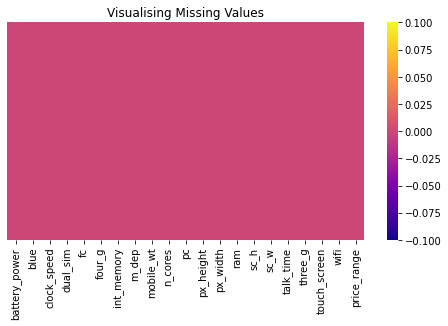

In [90]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title("Visualising Missing Values")

* We have Zero null values in data set.

In [91]:
#Description of the data
df.describe()
df.describe().T # transpose


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


* Minimum value of px_height and sc_w cannot be zero so we need to handle that.

In [92]:
# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))

180
2


In [93]:
#where ther is sc_W and px_height is zero ,assigning mean values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [94]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

* We have 0 duplicate values in our dataset.

In [95]:
#The nunique () method returns the number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [96]:
#checking whether there is null values or not
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* No Null values found. Which is good thing for us.

# EDA( Exploratory Data Analysis)

*  Exploratory data analysis (EDA) is a term for certain kinds of initial analysis and findings done with data sets, usually early on in an analytical process.
*  Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [97]:
# lets have look at our target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Wow.!  we have equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.

This is the target variable with value of
* 0=low cost
* 1=medium cost
* 2=high cost
* 3=very high cost

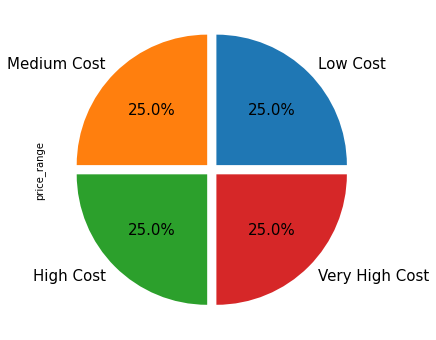

In [98]:
# Visualizing the Target variable's class distribution.
labels = ["Low Cost", "Medium Cost", "High Cost", "Very High Cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(10,6),fontsize=15)

* There are mobile phones in 4 price ranges. The number of elements is almost similar.

###Bluetooth

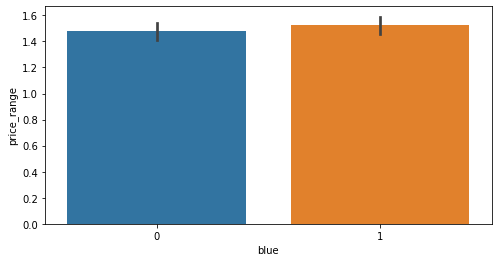

In [99]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)

* Half the devices have Bluetooth and half don’t.

###Ram

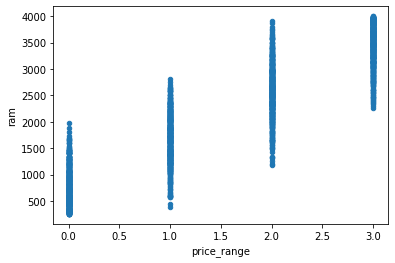

In [100]:
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

* Ram has continuous increase with price range while moving from Low cost to Very high cost.

###Pixel Width

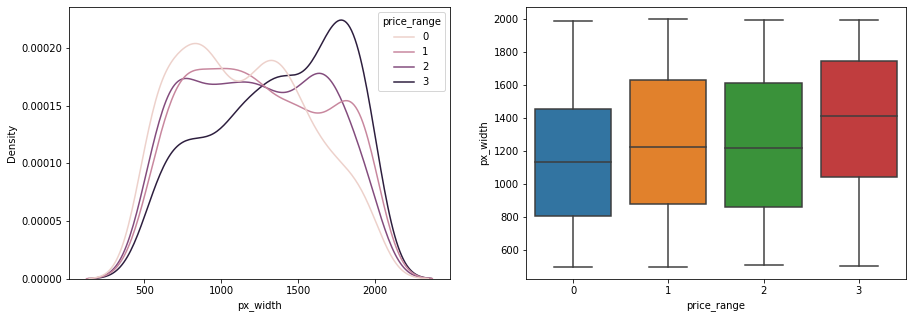

In [101]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

* There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width, so we can say that it would be a driving factor in deciding price_range.

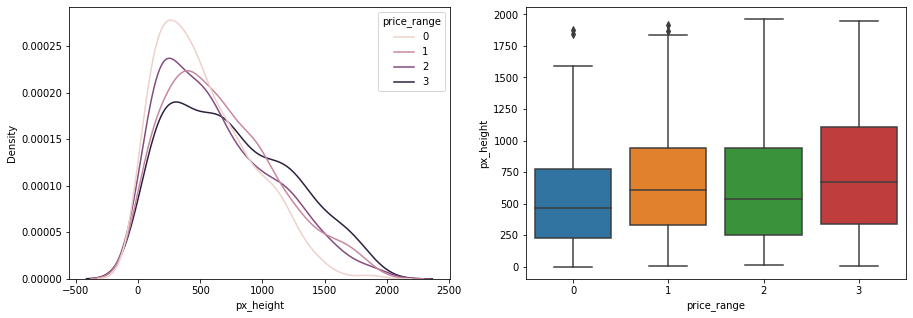

In [102]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

* Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height.

###FC (front camera megapixels)

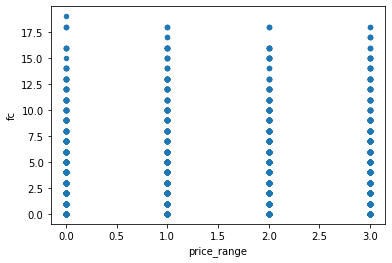

In [103]:
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

* This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.

###PC (Primary camera Megapixels)

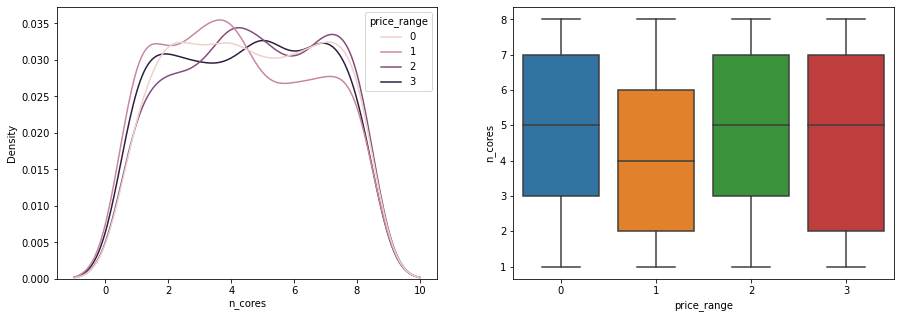

In [104]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

* Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

###Mobile Weight

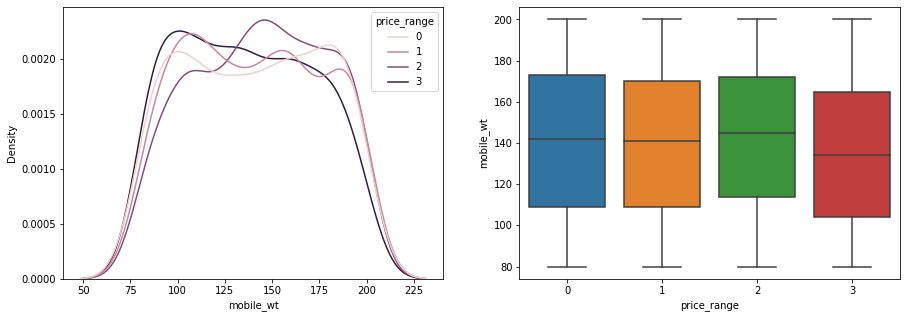

In [105]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

* From the above graph we can see that costly phones are lighter.

###Checking Outliers using Box plot
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

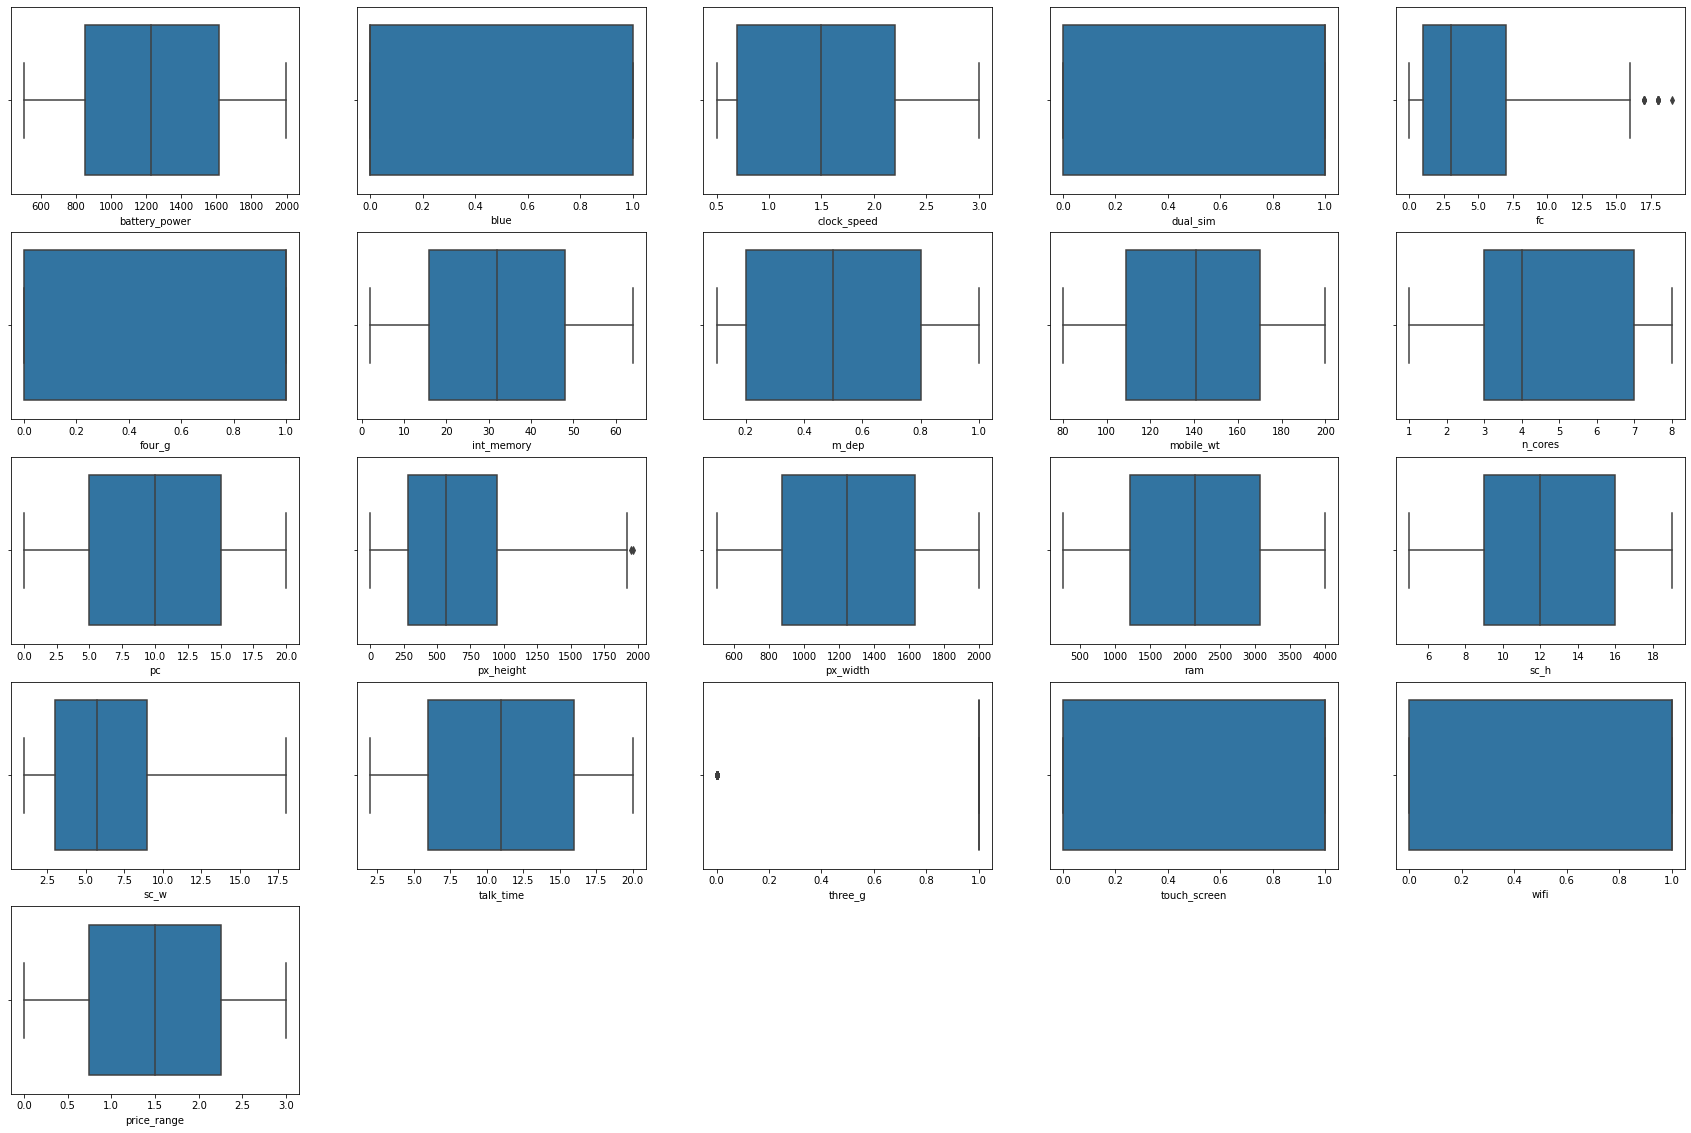

In [106]:
# looking for outliers using box plot
plt.figure(figsize=(30,20))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

* There are no much outliers.

##Correlation
Correlation Analysis is statistical method that is used to discover if there is a relationship between two variables/datasets, and how strong that relationship.

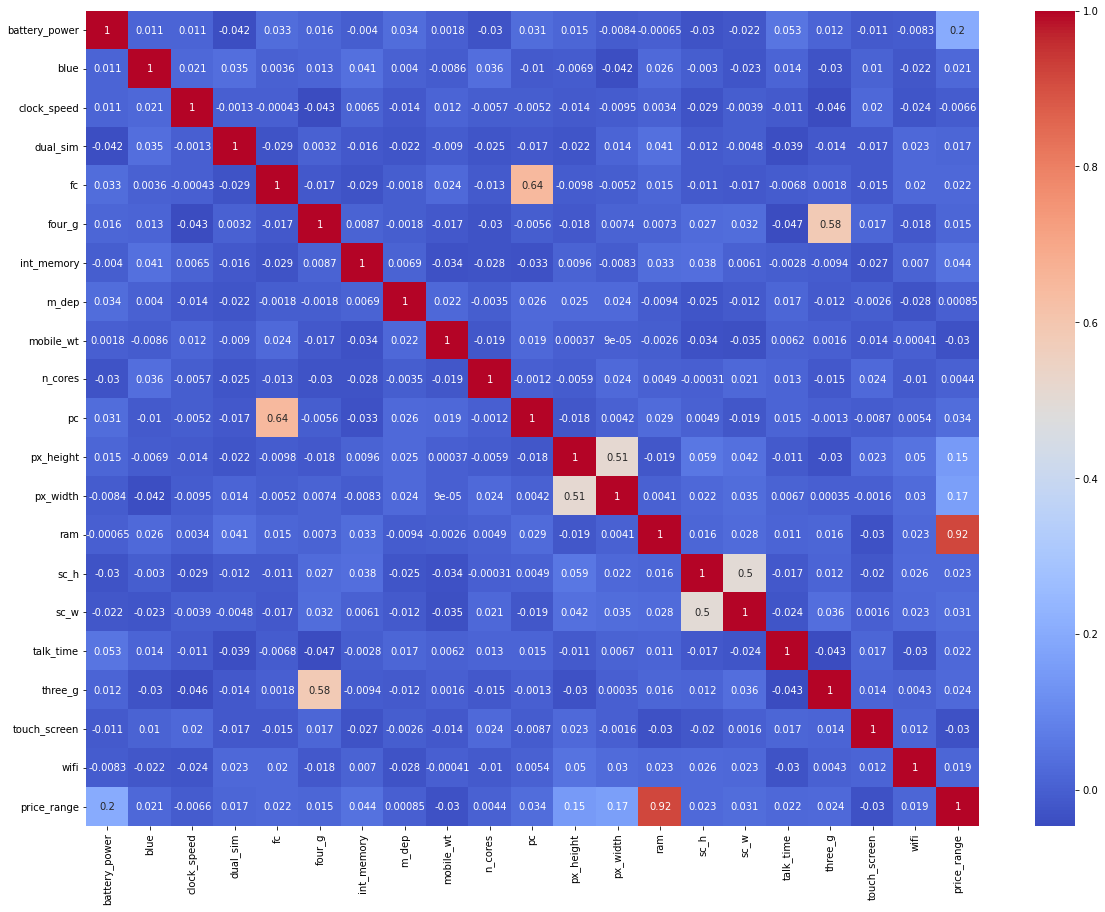

In [107]:
corr= df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True, cmap='coolwarm')

## Observations:
* RAM has strong positive correlation with the Price_range and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.
* Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.
* Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.

* Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

* primary camera i.e pc and front camera fc are positively correlated.
* sc_h and sc_w are positively correlated.

##Univariate Analysis of Categorical columns
While 'uni' means one, variate indicates a variable. Therefore, univariate analysis is a form of analysis that only involves a single variable. In a practical setting, a univariate analysis means the analysis of a single variable (or column) in a dataset (data table).

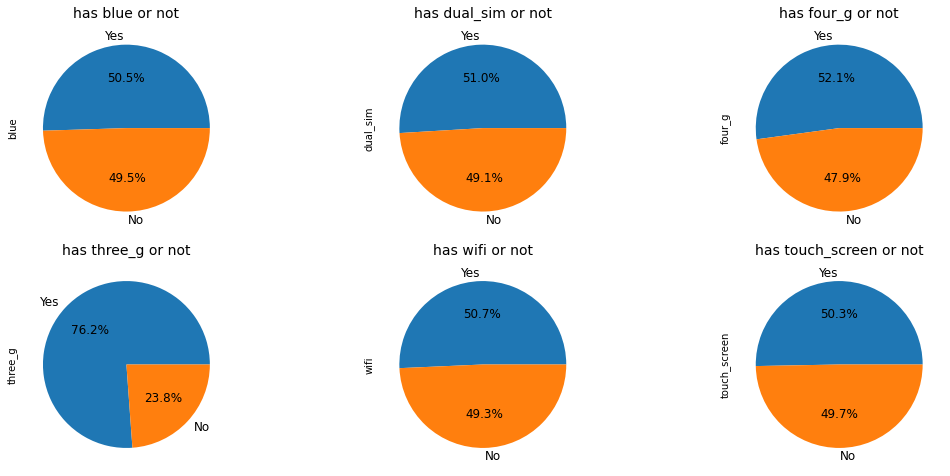

In [108]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

* 1 means it has the specifications.
* 0 means it do not have the specifications.
* Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.
* Very few mobiles(23.8%) do not have Three_g.

##Mobiles with both 3G and 4G.

In [109]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=df[(df['three_g']==1) & (df['four_g']==1)]

In [110]:
three_g_and_4g_df['price_range'].value_counts()

3    275
1    262
0    259
2    247
Name: price_range, dtype: int64

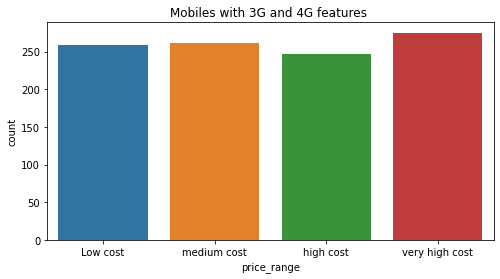

In [111]:
plt.figure(figsize=(8,4))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

* As we can see from low cost to very high cost mobiles have both features.

##Mobiles with 3G

In [112]:
three_g_df=df[(df['three_g']==1) & (df['four_g']!=1)]

In [113]:
three_g_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.000,11,1,0,0,2
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004.0,1654,1067,17,1.000,10,1,0,0,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512.0,1149,700,16,3.000,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386.0,836,1099,17,1.000,20,1,0,0,0
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607.0,748,1482,18,5.767,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1829,1,2.1,0,8,0,59,0.1,91,5,...,1457.0,1919,3142,16,6.000,5,1,1,1,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576.0,1809,1180,6,3.000,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888.0,1099,3962,15,11.000,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528.0,1416,3978,17,16.000,3,1,1,0,3


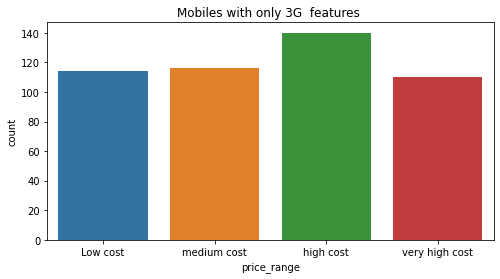

In [114]:
plt.figure(figsize=(8,4))
sns.countplot(three_g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with only 3G  features ")
plt.show()

##Observations:
* Mobiles which has very high cost are very less likely to have 3G.
* There are more chances that high cost mobile will have 3G in it.

##Mobiles not having no 3G and 4G.

In [115]:
No_3g_4G_df=df[(df['three_g']!=1) & (df['four_g']!=1)]

In [116]:
No_3g_4G_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7.000,19,0,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248.0,874,3946,5,2.000,7,0,0,0,3
19,682,1,0.5,0,4,0,19,1.0,121,4,...,902.0,1064,2337,11,1.000,18,0,1,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407.0,822,1433,11,5.000,20,0,0,1,1
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1358.0,1739,3532,17,11.000,12,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698.0,1018,1300,10,5.767,2,0,0,1,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,...,610.0,1437,2313,14,1.000,11,0,1,0,2
1983,1262,0,1.8,1,12,0,34,0.1,149,5,...,223.0,737,3248,13,3.000,4,0,1,1,2
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347.0,957,1620,9,2.000,19,0,1,1,1


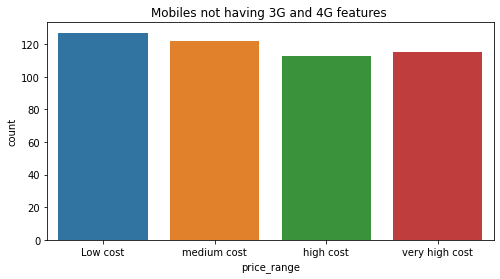

In [117]:
plt.figure(figsize=(8,4))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

##Observation:
* Its very obvious that low cost mobiles will not have 3G and 4G.
* Mobiles with very high cost may have 5G. As we know technologies are changes everytime.

# Predictive Modeling:
Algorithms used for predictive modeling:
* 1) Logistic Regression
* 2) Random Forest Classifier
* 3) Decision tree
* 4) XG Boost Classifier 


##Train Test split for regression

In [118]:
# Defining X and y
X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [119]:
X.shape

(2000, 20)

In [120]:
y.shape

(2000,)

In [121]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [122]:
# Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [123]:
X_train.shape

(1600, 20)

In [124]:
y_train.shape

(1600,)

##Logistic Regression
Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. 



In [125]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [126]:
# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test

In [127]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.95      0.91      0.92        95
           2       0.84      0.92      0.88        84
           3       0.97      0.95      0.96       115

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



[[105   0   0   0]
 [  1  86   4   0]
 [  0   9  77   6]
 [  0   0   3 109]]


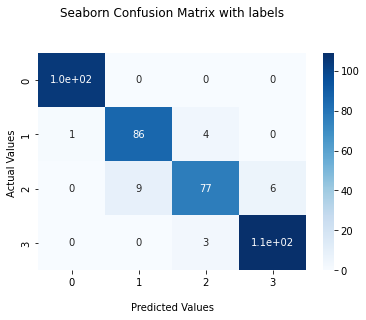

In [128]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [129]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       406
           1       0.90      0.92      0.91       402
           2       0.90      0.93      0.92       393
           3       0.98      0.95      0.97       399

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



###Observations of Logistic Regression:
* Test accuarcy = 94%
* Training accuarcy = 94%

##Random Forest Classifier
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [130]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [132]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.89

In [133]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.86      0.86      0.86        91
           2       0.80      0.85      0.83        92
           3       0.94      0.89      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



[[100   5   0   0]
 [  6  78   7   0]
 [  0   8  78   6]
 [  0   0  12 100]]


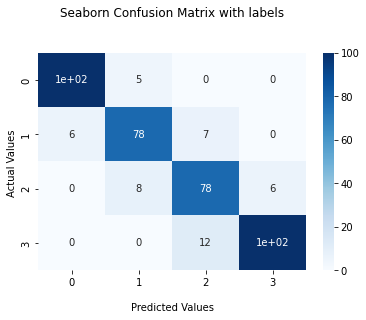

In [135]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [136]:
feature_importance = pd.DataFrame({'Feature':X.columns,'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.473170
1,battery_power,0.074733
2,px_height,0.057415
3,px_width,0.055561
4,mobile_wt,0.040605


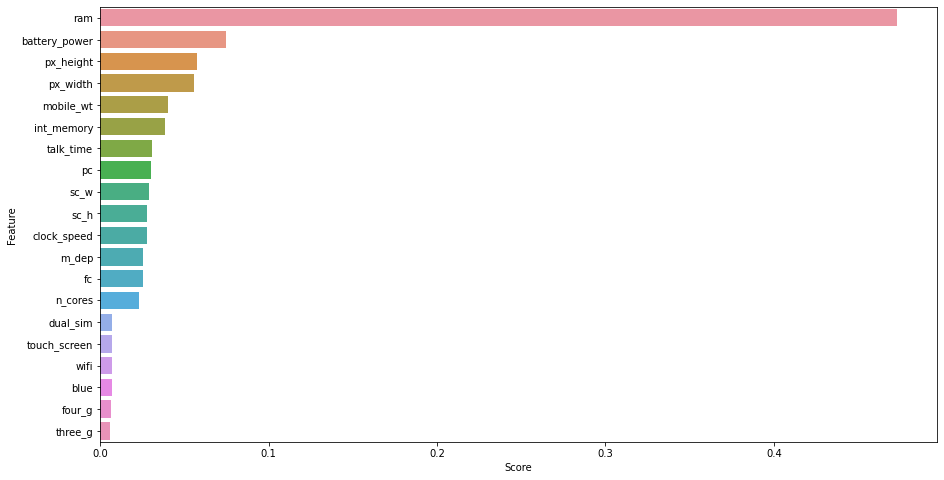

In [137]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

###Hyperparameter tuning for Random Forest

In [138]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [139]:
clsr.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 100}

In [140]:
clsr.best_estimator_

RandomForestClassifier(max_depth=30, max_features='sqrt', max_leaf_nodes=40,
                       min_samples_split=4)

In [141]:
clsr.best_score_

0.8664924294609452

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [143]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8825

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.85      0.82      0.84        91
           2       0.80      0.82      0.81        92
           3       0.93      0.91      0.92       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



[[101   4   0   0]
 [  7  75   9   0]
 [  0   9  75   8]
 [  0   0  10 102]]


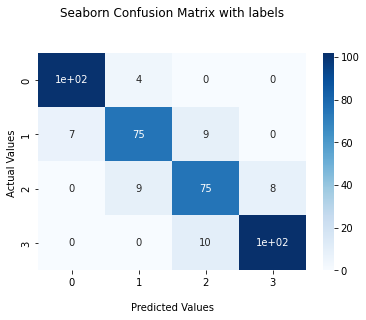

In [145]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [146]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.955625

In [147]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       395
           1       0.93      0.93      0.93       409
           2       0.94      0.93      0.94       408
           3       0.98      0.98      0.98       388

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [148]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.653171
1,battery_power,0.072028
2,px_width,0.050366
3,px_height,0.047128
4,mobile_wt,0.027507


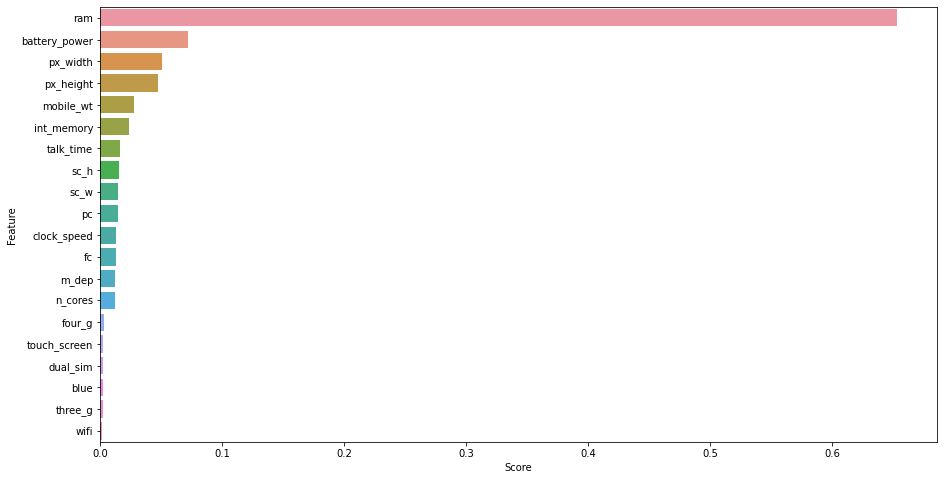

In [149]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

###Observations of Random Forest:
Before Tuning
* Training accuarcy = 100%
* Test accuarcy = 88%

Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.

After tuning:
* Training accuarcy= 95%
* Test accuarcy = 87%

we have slightly improved the model and overfitting is reduced slightly.

##Decision tree
Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [150]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [151]:
# Prediction

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

In [152]:
accuracy_score(y_test, y_pred_test)

0.7975

In [153]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        97
           1       0.77      0.73      0.75        96
           2       0.73      0.65      0.69       103
           3       0.81      0.88      0.84       104

    accuracy                           0.80       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.79      0.80      0.79       400



In [154]:
# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.800 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.819 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.803 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.772 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.794 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [155]:
# Prediction

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       105
           1       0.74      0.84      0.78        91
           2       0.76      0.70      0.73        92
           3       0.87      0.90      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.83      0.83       400



[[ 91  14   0   0]
 [  6  76   9   0]
 [  0  13  64  15]
 [  0   0  11 101]]


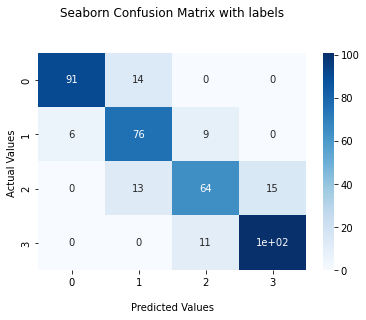

In [156]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [157]:
# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       395
           1       0.83      0.83      0.83       409
           2       0.80      0.82      0.81       408
           3       0.93      0.89      0.91       388

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



###Observations of Decision Tree:
* Test accuarcy = 80%
* Training accuarcy = 87%

##XGBoost Classifier
XGBoost tackles this inefficiency by looking at the distribution of features across all data points in a leaf and using this information to reduce the search space of possible feature splits.

In [158]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.86      0.95      0.90        91
           2       0.88      0.85      0.86        92
           3       0.94      0.91      0.93       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [159]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)

Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [160]:
# Cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.869 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.869 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.844 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.825 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(max_depth=5, objective='multi:softprob'),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [161]:
# Prediction

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)

Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.92      0.91        91
           2       0.86      0.87      0.86        92
           3       0.94      0.91      0.93       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



[[101   4   0   0]
 [  4  84   3   0]
 [  0   6  80   6]
 [  0   0  10 102]]


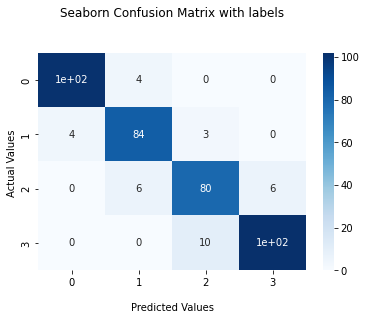

In [162]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [163]:
# Evaluation metrics for train
score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.98      0.99      0.98       409
           2       0.98      0.99      0.98       408
           3       1.00      0.99      0.99       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



##Observation
*  Test accuarcy = 90%
*  Training accuarcy = 98%

#Conclusion

*  From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.

*  half the devices have Bluetooth, and half don’t

*  there is a gradual increase in battery as the price range increases

*  Ram has continuous increase with price range while moving from Low cost to Very high cost

*  costly phones are lighter

*  RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

* form all the above experiments we can conclude that logistic regression and, XGboosting with using hyperparameters we got the best results